# **Decision Tree Assignement**

* Dataset Link - https://archive.ics.uci.edu/ml/datasets/Balloons


## Task 1: Understand the data 

In [0]:
import pandas as pd
import numpy as np

In [9]:
from google.colab import files
uploaded = files.upload()

Saving balloon_data.csv to balloon_data.csv


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['balloon_data.csv']))

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Color     76 non-null     object
 1   size      76 non-null     object
 2   act       76 non-null     object
 3   age       76 non-null     object
 4   inflated  76 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


* Balloon_data.csv file contains the data of all four file of the directory.

In [0]:
data.drop_duplicates(keep='first' , inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 56
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Color     28 non-null     object
 1   size      28 non-null     object
 2   act       28 non-null     object
 3   age       28 non-null     object
 4   inflated  28 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [17]:
data.sample(5)

,Color,size,act,age,inflated
31,PURPLE,SMALL,STRETCH,CHILD,T
5,YELLOW,LARGE,STRETCH,ADULT,T
26,YELLOW,LARGE,STRETCH,CHILD,T
4,YELLOW,SMALL,DIP,CHILD,F
12,PURPLE,SMALL,STRETCH,CHILD,F


In [0]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
feature_target = oe.fit_transform(data)

In [19]:
feature_target

array([[1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 0.],
       [1., 1., 0., 0., 0.],
       [1., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 1.],
       [0., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 1.],
       [1., 0., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1.],
       [1., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [20]:
oe.categories_

[array(['PURPLE', 'YELLOW'], dtype=object),
 array(['LARGE', 'SMALL'], dtype=object),
 array(['DIP', 'STRETCH'], dtype=object),
 array(['ADULT', 'CHILD'], dtype=object),
 array(['F', 'T'], dtype=object)]

**Task 2: Manually - Generate Decision Tree using Information Gain & Gini Impurity**

In [21]:
data.inflated.value_counts()

F    15
T    13
Name: inflated, dtype: int64

In [0]:
EntropyBeforeSplit = - ((13/28)*np.log2(13/28) + (15/28)*np.log2(15/28))

In [23]:
EntropyBeforeSplit

0.996316519558962

**Data discretize done using Binning Techniques**

* For Color columns
  * Buckets [.,0.5,.]
* For size column
  * Buckets [.,0.5,.]
* For act columns
  * Buckets [.,0.5,.]
* For age column
  * Buckets [.,0.5,.]
  

**The possible decisions**
* For Color columns
  * (a) Color < 0.5
* For size column
  * (b) size < 0.5
* For act columns
  * (c) act < 0.5
* For age column
  * (d) age < 0.5


Conclusion : We have four questions to choose from for this dataset during training

# **Let's calculate Information Gain using all these & identify the best question for root**
* Let's check for question a

In [0]:
data_1 = pd.DataFrame(feature_target, columns=['Color','size','act','age','inflated'], dtype='int')

In [27]:
# Left side
data_1[data_1.Color <= 0.5]

,Color,size,act,age,inflated
8,0,1,1,0,1
9,0,1,1,1,0
10,0,1,0,0,0
11,0,1,0,1,0
12,0,0,1,0,1
13,0,0,1,1,0
14,0,0,0,0,0
15,0,0,0,1,0
20,0,1,1,1,1
21,0,1,0,0,1


In [29]:
data_1[data_1.Color <= 0.5].inflated.value_counts()

0    8
1    6
Name: inflated, dtype: int64

In [30]:
EntropyLeftSplit = -((8/14)*np.log2(8/14) + (6/14)*np.log2(6/14))
EntropyLeftSplit

0.9852281360342515

In [42]:
# Right side
data_1[data_1.Color > 0.5]

,Color,size,act,age,inflated
0,1,1,1,0,1
1,1,1,1,1,0
2,1,1,0,0,0
3,1,1,0,1,0
4,1,0,1,0,1
5,1,0,1,1,0
6,1,0,0,0,0
7,1,0,0,1,0
16,1,1,1,1,1
17,1,1,0,0,1


In [33]:
data_1[data_1.Color > 0.5].inflated.value_counts()

1    7
0    7
Name: inflated, dtype: int64

In [34]:
EntropyRightSplit = -((7/14)*np.log2(7/14) + (7/14)*np.log2(7/14))
EntropyRightSplit

1.0

In [35]:
EntropySplit = (14/28)* EntropyLeftSplit + (14/28)*EntropyRightSplit
EntropySplit

0.9926140680171258

In [36]:
Information_Gain_Question_a = EntropyBeforeSplit - EntropySplit
Information_Gain_Question_a 

0.003702451541836238

<hr>

* Let's check for question b

In [45]:
# Left side
data_1[data_1['size'] <= 0.5]

,Color,size,act,age,inflated
4,1,0,1,0,1
5,1,0,1,1,0
6,1,0,0,0,0
7,1,0,0,1,0
12,0,0,1,0,1
13,0,0,1,1,0
14,0,0,0,0,0
15,0,0,0,1,0
18,1,0,1,1,1
19,1,0,0,0,1


In [46]:
data_1[data_1['size'] <= 0.5].inflated.value_counts()

0    8
1    6
Name: inflated, dtype: int64

In [47]:
EntropyLeftSplit = -((8/14)*np.log2(8/14) + (6/14)*np.log2(6/14))
EntropyLeftSplit

0.9852281360342515

In [48]:
# Right side
data_1[data_1['size'] > 0.5]

,Color,size,act,age,inflated
0,1,1,1,0,1
1,1,1,1,1,0
2,1,1,0,0,0
3,1,1,0,1,0
8,0,1,1,0,1
9,0,1,1,1,0
10,0,1,0,0,0
11,0,1,0,1,0
16,1,1,1,1,1
17,1,1,0,0,1


In [49]:
data_1[data_1['size'] > 0.5].inflated.value_counts()

1    7
0    7
Name: inflated, dtype: int64

In [50]:
EntropyRightSplit = -((7/14)*np.log2(7/14) + (7/14)*np.log2(7/14))
EntropyRightSplit

1.0

In [51]:
EntropySplit = (14/28)* EntropyLeftSplit + (14/28)*EntropyRightSplit
EntropySplit

0.9926140680171258

In [52]:
Information_Gain_Question_b = EntropyBeforeSplit - EntropySplit
Information_Gain_Question_b 

0.003702451541836238

<hr>

* Let's check for question c

In [53]:
# Left side
data_1[data_1.act <= 0.5]

,Color,size,act,age,inflated
2,1,1,0,0,0
3,1,1,0,1,0
6,1,0,0,0,0
7,1,0,0,1,0
10,0,1,0,0,0
11,0,1,0,1,0
14,0,0,0,0,0
15,0,0,0,1,0
17,1,1,0,0,1
19,1,0,0,0,1


In [54]:
data_1[data_1.act <= 0.5].inflated.value_counts()

0    8
1    5
Name: inflated, dtype: int64

In [55]:
EntropyLeftSplit = -((8/13)*np.log2(8/13) + (5/13)*np.log2(5/13))
EntropyLeftSplit

0.9612366047228759

In [56]:
# Right side
data_1[data_1.act > 0.5]

,Color,size,act,age,inflated
0,1,1,1,0,1
1,1,1,1,1,0
4,1,0,1,0,1
5,1,0,1,1,0
8,0,1,1,0,1
9,0,1,1,1,0
12,0,0,1,0,1
13,0,0,1,1,0
16,1,1,1,1,1
18,1,0,1,1,1


In [57]:
data_1[data_1.act > 0.5].inflated.value_counts()

1    8
0    7
Name: inflated, dtype: int64

In [58]:
EntropyRightSplit = -((8/15)*np.log2(8/15) + (7/15)*np.log2(7/15))
EntropyRightSplit

0.9967916319816366

In [59]:
EntropySplit = (13/28)* EntropyLeftSplit + (15/28)*EntropyRightSplit
EntropySplit

0.9802839407543549

In [60]:
Information_Gain_Question_c = EntropyBeforeSplit - EntropySplit
Information_Gain_Question_c 

0.016032578804607178

<hr>

* Let's check for question d.

In [61]:
# Left side
data_1[data_1.age <= 0.5]

,Color,size,act,age,inflated
0,1,1,1,0,1
2,1,1,0,0,0
4,1,0,1,0,1
6,1,0,0,0,0
8,0,1,1,0,1
10,0,1,0,0,0
12,0,0,1,0,1
14,0,0,0,0,0
17,1,1,0,0,1
19,1,0,0,0,1


In [62]:
data_1[data_1.age <= 0.5].inflated.value_counts()

1    8
0    7
Name: inflated, dtype: int64

In [63]:
EntropyLeftSplit = -((8/15)*np.log2(8/15) + (7/15)*np.log2(7/15))
EntropyLeftSplit

0.9967916319816366

In [64]:
# Right side
data_1[data_1.age > 0.5]

,Color,size,act,age,inflated
1,1,1,1,1,0
3,1,1,0,1,0
5,1,0,1,1,0
7,1,0,0,1,0
9,0,1,1,1,0
11,0,1,0,1,0
13,0,0,1,1,0
15,0,0,0,1,0
16,1,1,1,1,1
18,1,0,1,1,1


In [65]:
data_1[data_1.age > 0.5].inflated.value_counts()

0    8
1    5
Name: inflated, dtype: int64

In [66]:
EntropyRightSplit = -((8/13)*np.log2(8/13) + (5/13)*np.log2(5/13))
EntropyRightSplit

0.9612366047228759

In [67]:
EntropySplit = (15/28)* EntropyLeftSplit + (13/28)*EntropyRightSplit
EntropySplit

0.9802839407543549

In [68]:
Information_Gain_Question_d = EntropyBeforeSplit - EntropySplit
Information_Gain_Question_d

0.016032578804607178

* **Now, we will be creating the subtree, root is decision (d)**

In [0]:
subtree = data_1[data_1.age <= 0.5]

In [83]:
subtree

,Color,size,act,age,inflated
0,1,1,1,0,1
2,1,1,0,0,0
4,1,0,1,0,1
6,1,0,0,0,0
8,0,1,1,0,1
10,0,1,0,0,0
12,0,0,1,0,1
14,0,0,0,0,0
17,1,1,0,0,1
19,1,0,0,0,1


In [84]:
subtree.inflated.value_counts()

1    8
0    7
Name: inflated, dtype: int64

In [85]:
EntropyBeforeSplit = - ((8/15)*np.log2(8/15) + (7/15)*np.log2(7/15))
EntropyBeforeSplit

0.9967916319816366

* Let's test for questions c (act <= 0.5)

In [86]:
# Left side
subtree[subtree.act <= 0.5]

,Color,size,act,age,inflated
2,1,1,0,0,0
6,1,0,0,0,0
10,0,1,0,0,0
14,0,0,0,0,0
17,1,1,0,0,1
19,1,0,0,0,1
21,0,1,0,0,1
23,0,0,0,0,1


In [87]:
subtree[subtree.act <= 0.5].inflated.value_counts()

1    4
0    4
Name: inflated, dtype: int64

In [88]:
EntropyLeftSplit = -((4/8)*np.log2(4/8) + (4/8)*np.log2(4/8))
EntropyLeftSplit


1.0

In [89]:
# Right side
subtree[subtree.act > 0.5]

,Color,size,act,age,inflated
0,1,1,1,0,1
4,1,0,1,0,1
8,0,1,1,0,1
12,0,0,1,0,1
25,1,0,1,0,0
26,0,1,1,0,0
27,0,0,1,0,0


In [90]:
subtree[subtree.act > 0.5].inflated.value_counts()

1    4
0    3
Name: inflated, dtype: int64

In [91]:
EntropyRightSplit = -((4/7)*np.log2(4/7) + (3/7)*np.log2(3/7))
EntropyRightSplit

0.9852281360342515

In [92]:
EntropySplit = (8/15)* EntropyLeftSplit + (7/15)*EntropyRightSplit
EntropySplit

0.9931064634826507

In [93]:
Information_Gain_Question_c = EntropyBeforeSplit - EntropySplit
Information_Gain_Question_c 

0.0036851684989858136

* Let's test for questions b (size <= 0.5)

In [94]:
# Left side
subtree[subtree['size'] <= 0.5]

,Color,size,act,age,inflated
4,1,0,1,0,1
6,1,0,0,0,0
12,0,0,1,0,1
14,0,0,0,0,0
19,1,0,0,0,1
23,0,0,0,0,1
25,1,0,1,0,0
27,0,0,1,0,0


In [95]:
subtree[subtree['size'] <= 0.5].inflated.value_counts()

1    4
0    4
Name: inflated, dtype: int64

In [96]:
EntropyLeftSplit = -((4/8)*np.log2(4/8) + (4/8)*np.log2(4/8))
EntropyLeftSplit

1.0

In [97]:
# Right side
subtree[subtree['size'] > 0.5]

,Color,size,act,age,inflated
0,1,1,1,0,1
2,1,1,0,0,0
8,0,1,1,0,1
10,0,1,0,0,0
17,1,1,0,0,1
21,0,1,0,0,1
26,0,1,1,0,0


In [98]:
subtree[subtree['size'] > 0.5].inflated.value_counts()

1    4
0    3
Name: inflated, dtype: int64

In [99]:
EntropyRightSplit = -((4/7)*np.log2(4/7) + (3/7)*np.log2(3/7))
EntropyRightSplit

0.9852281360342515

In [100]:
EntropySplit = (8/15)* EntropyLeftSplit + (7/15)*EntropyRightSplit
EntropySplit

0.9931064634826507

In [101]:
Information_Gain_Question_b = EntropyBeforeSplit - EntropySplit
Information_Gain_Question_b 

0.0036851684989858136

* we have keep on doing this to get the tree, insted we can directy use the moduel to get the decision.

# **Let's calculate GINI Gain using all these & identify the best question for root**
* Let's check for question a

In [105]:
data_1.inflated.value_counts()

0    15
1    13
Name: inflated, dtype: int64

In [106]:
GiniBeforeSplit = (15/28)*(1-15/28) + (13/28)*(1-13/28)
GiniBeforeSplit

0.49744897959183676

* Finding Gini gain for question d

In [107]:
# Left side
data_1[data_1.age <= 0.5].inflated.value_counts()

1    8
0    7
Name: inflated, dtype: int64

In [108]:
GiniLeft = (8/15)*(1-8/15) + (7/15)*(1-7/15)
GiniLeft

0.49777777777777776

In [109]:
# Right side
data_1[data_1.age > 0.5].inflated.value_counts()

0    8
1    5
Name: inflated, dtype: int64

In [110]:
GiniRight = (8/13)*(1-8/13) + (5/13)*(1-5/13)
GiniRight

0.47337278106508873

In [112]:
GiniSplit = (15/28)*GiniLeft + (13/28)*GiniRight
GiniSplit

0.48644688644688644

In [114]:
GiniGain_d = GiniBeforeSplit - GiniSplit
GiniGain_d

0.01100209314495032

* Finding Gini gain for question a

In [115]:
# Left side
data_1[data_1.Color <= 0.5].inflated.value_counts()

0    8
1    6
Name: inflated, dtype: int64

In [116]:
GiniLeft = (8/14)*(1-8/14) + (6/14)*(1-6/14)
GiniLeft

0.4897959183673469

In [117]:
# Right side
data_1[data_1.Color > 0.5].inflated.value_counts()

1    7
0    7
Name: inflated, dtype: int64

In [118]:
GiniRight = (7/14)*(1-7/14) + (7/14)*(1-7/14)
GiniRight

0.5

In [119]:
GiniSplit = (14/28)*GiniLeft + (14/28)*GiniRight
GiniSplit

0.49489795918367346

In [120]:
GiniGain_a = GiniBeforeSplit - GiniSplit
GiniGain_a

0.002551020408163296

* Conclusion in both info. gain and gini gane we are about to follow the same trend as we can see that GiniGain_d is greater that GiniGain_a.

**Task 3: scikit - Generate & Display Decision Tree using export_graphviz**

In [0]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [0]:
dt = DecisionTreeClassifier(criterion='entropy')

In [78]:
dt.fit(data_1[['Color', 'size', 'act', 'age']] , data.inflated)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
export_graphviz(dt,'dt1.tree',feature_names=['Color', 'size', 'act', 'age'])

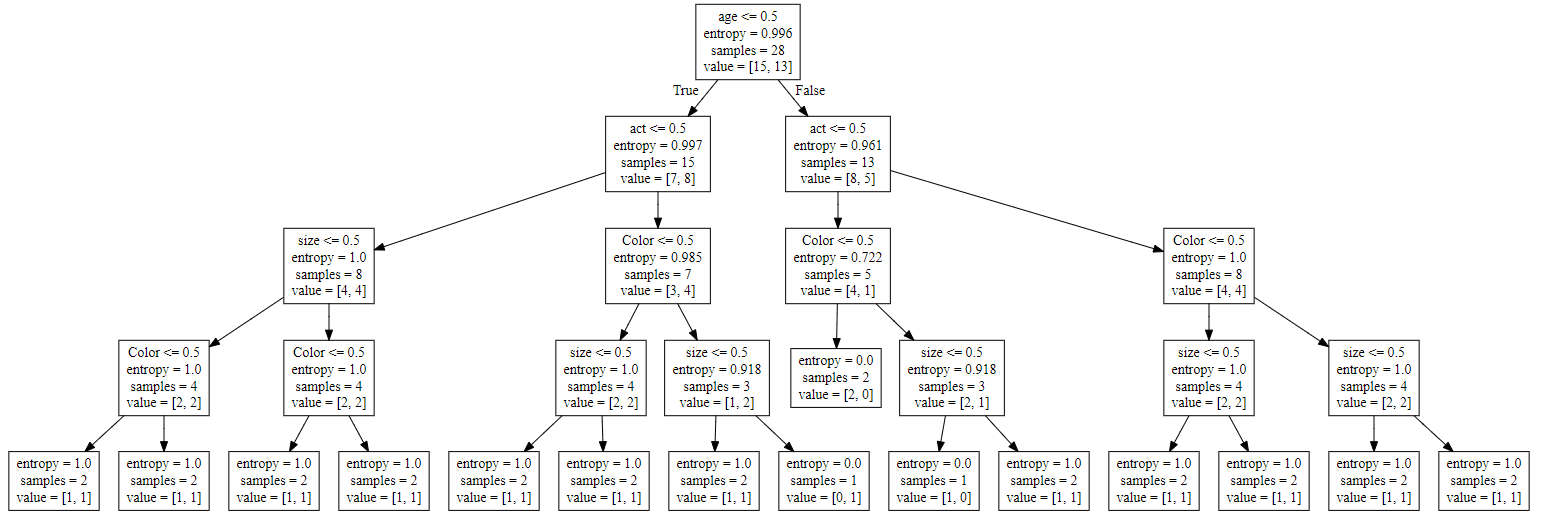

In [0]:
dt_gini = DecisionTreeClassifier(criterion='gini')

In [103]:
dt_gini.fit(data_1[['Color', 'size', 'act', 'age']] , data.inflated)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
export_graphviz(dt_gini,'dt2.tree',feature_names=['Color', 'size', 'act', 'age'])

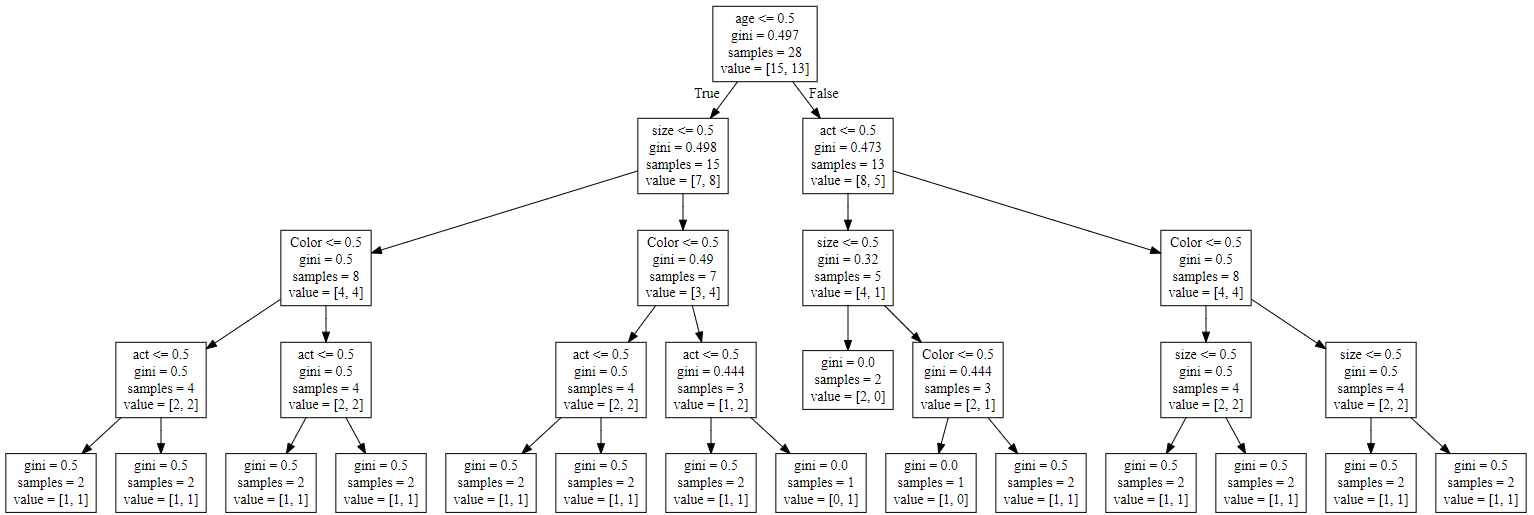